На выходе нас интересуют следующие данные:

☑ ABC / XYZ - анализ товарной номенклатуры и клиентской базы

☑ Когортный анализ клиентов

☑ Сформулированные выводы и предложения по сегментированию базы и товарной номенклатуры

# ABC / XYZ - анализ товарной номенклатуры и клиентской базы

In [1]:
import pandas as pd
from sklearn import preprocessing
from datetime import datetime
import matplotlib.pyplot as plt # graphs
import seaborn as sns
import numpy as np

from datetime import timedelta

sns.set_style("dark")
sns.set()


In [2]:
df = pd.read_excel('~/Documents/IM_Sales.xlsx',
                   dtype={     'КодКонтрагента':str,
                               'ТипКонтрагента':str,
                               'РегионКонтрагента':str,
                               'ДатаПродажи':str,
                               'Ответственный':str,
                               'КодНоменклатуры':str})

In [3]:
df.drop(
    columns=['ИННКонтрагента','Контрагент','НомерПродажи','Номенклатура','СтоимостьПродажиСНДС','НДС',
             'СебестоимостьИлиСтоимостьПоПрайсу','РасчетнаяПрибыль','Ответственный'], inplace = True)

In [4]:
pd.set_option('display.max_rows',6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8441 entries, 0 to 8440
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   КодКонтрагента          8441 non-null   object 
 1   ТипКонтрагента          8441 non-null   object 
 2   РегионКонтрагента       8309 non-null   object 
 3   ДатаПродажи             8441 non-null   object 
 4   КодНоменклатуры         8441 non-null   object 
 5   Количество              8441 non-null   int64  
 6   СтоимостьПродажиБезНДС  8441 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 461.7+ KB


Меняем форматы

In [6]:
df['ДатаПродажи'] = pd.to_datetime(df['ДатаПродажи'])

In [7]:
df[['КодКонтрагента','ТипКонтрагента','РегионКонтрагента','КодНоменклатуры']] = \
df[['КодКонтрагента','ТипКонтрагента','РегионКонтрагента','КодНоменклатуры']].astype(str)

In [8]:
#Возвраты не обнаруживаем
df[df['Количество']<0].count().sum()

0

In [9]:
#Пропуски не обнаруживаем
df.isna().sum().sum()

0

Меняем числовые данные на категориальные

In [10]:
from sklearn import preprocessing
lable_encoder = preprocessing.LabelEncoder()
cols = ['ТипКонтрагента','РегионКонтрагента']
for col in cols:
    df[col] = lable_encoder.fit_transform(df[col])
    print(lable_encoder.classes_)

['Аптеки, фармкомпании, аптечные базы'
 'Ветеринарии, зверосовхозы, агрофирмы' 'Городские больницы' 'Гостиницы'
 'Кафе, рестораны, предприятия общепита' 'Коммерческие, торговые компании'
 'Медицинские центры' 'НИИ, ВУЗы, институты' 'Не распределенные'
 'Парикмахерские, салоны красоты, тату-салоны' 'Поликлиники'
 'Поставщики товаров' 'Поставщики услуг' 'Прочие объекты'
 'Районные больницы' 'Санатории, пансионаты, турбазы'
 'Стоматологические клиники и поликлиники'
 'Строительные и эксплуатационные компании, ТСЖ, ЖЭУ, ЖСК'
 'Торговые сети и ритейл' 'Физические лица'
 'Школы, детские сады, учебные учреждения']
['nan' 'Адыгея Респ' 'Алтайский край' 'Архангельская обл'
 'Астраханская обл' 'Башкортостан Респ' 'Белгородская обл' 'Брянская обл'
 'Бурятия Респ' 'Владимирская обл' 'Волгоградская обл' 'Вологодская обл'
 'Воронежская обл' 'Дагестан Респ' 'Еврейская Аобл' 'Забайкальский край'
 'Ивановская обл' 'Ингушетия Респ' 'Иркутская обл' 'КАЗАХСТАН'
 'Кабардино-Балкарская Респ' 'Калининградска

In [11]:
df['МесяцПродажи'] = pd.DatetimeIndex(df['ДатаПродажи']).month

# XYZ анализ

Для анализа возьмем продажи за последние 12 месяцев (в файле взят полный 2022 год), сгруппируем по коду и месяцу. 

In [12]:
df_12m = df[(df['ДатаПродажи'] >= '2022-01-01') & (df['ДатаПродажи'] < '2023-01-01')]

In [40]:
df['СтоимостьПродажиБезНДС'].sum()

3768423.03

In [13]:
df_12m = df.groupby(['КодКонтрагента','КодНоменклатуры','МесяцПродажи'])\
                ['Количество','СтоимостьПродажиБезНДС'].sum().reset_index()

<ipython-input-13-903d3e6971e3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_12m = df.groupby(['КодКонтрагента','КодНоменклатуры','МесяцПродажи'])\


In [14]:
df_12m

,КодКонтрагента,КодНоменклатуры,МесяцПродажи,Количество,СтоимостьПродажиБезНДС
0,01509,1780,12,1,416.67
1,01509,4534,4,1,415.83
2,01509,4534,8,1,415.83
...,...,...,...,...,...
7555,48807,4534,1,1,450.00
7556,48813,4534,1,1,550.00
7557,48823,4534,1,1,450.00


График сезонности лучше показывает, как количество и стоимость продаж меняются в течение года. Весенние месяцы более загружены и пик выручки пришелся на ноябрь. 

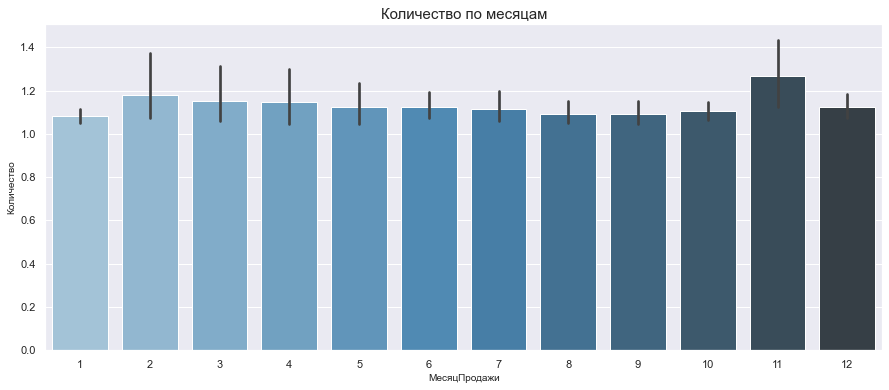

In [15]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="МесяцПродажи", 
                 y="Количество", 
                 data=df_12m,
                 palette="Blues_d")\
                .set_title("Количество по месяцам",fontsize=15)


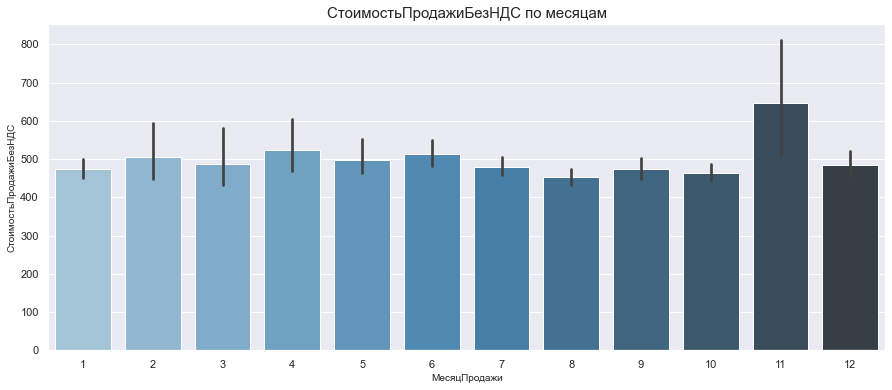

In [16]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="МесяцПродажи", 
                 y="СтоимостьПродажиБезНДС", 
                 data=df_12m,
                 palette="Blues_d")\
                .set_title("СтоимостьПродажиБезНДС по месяцам",fontsize=15)

Сгруппируем датасет с нужными колонками и, для удобства подсчета, переформатируем данные в матрицу с месяцами в столбцах 

In [17]:
df_12m_units = df_12m.groupby(['КодНоменклатуры','МесяцПродажи'])['Количество'].sum().to_frame().reset_index()
df_12m_units.head()

,КодНоменклатуры,МесяцПродажи,Количество
0,14796,11,15
1,16069,1,60
2,16069,2,57
3,16069,3,52
4,16069,4,47


In [18]:
df_12m_units = df_12m_units.pivot(index='КодНоменклатуры', columns='МесяцПродажи', values='Количество')\
                           .add_prefix('m').reset_index().fillna(0)
df_12m_units.head()


МесяцПродажи,КодНоменклатуры,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,14796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0
1,16069,60.0,57.0,52.0,47.0,54.0,65.0,76.0,77.0,93.0,87.0,83.0,72.0
2,16070,8.0,17.0,17.0,15.0,9.0,39.0,50.0,30.0,23.0,39.0,16.0,23.0
3,16622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0
4,1780,448.0,433.0,437.0,427.0,523.0,588.0,522.0,470.0,516.0,591.0,456.0,410.0


Подсчитаем общее количество, среднее, стандартное отклонение и коэффициент

In [19]:
df_12m_units['total_demand'] = df_12m_units['m1'] + df_12m_units['m2'] + df_12m_units['m3'] +\
                               df_12m_units['m4'] + df_12m_units['m5'] + df_12m_units['m6'] +\
                               df_12m_units['m7'] + df_12m_units['m8'] + df_12m_units['m9'] +\
                               df_12m_units['m10'] + df_12m_units['m11'] + df_12m_units['m12']

In [20]:
df_12m_units['avg_demand'] = df_12m_units['total_demand'] / 12 

In [21]:
df_12m_units['std_demand'] = df_12m_units[['m1','m2','m3','m4','m5','m6',
                                    'm7','m8','m9','m10','m11','m12']].std(axis=1)

In [22]:
df_12m_units['cov_demand'] = df_12m_units['std_demand'] / df_12m_units['avg_demand']

Изучаем его максимальные и минимальне показатели. 

In [23]:
df_12m_units.head()

МесяцПродажи,КодНоменклатуры,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,total_demand,avg_demand,std_demand,cov_demand
0,14796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,15.0,1.250000,4.330127,3.464102
1,16069,60.0,57.0,52.0,47.0,54.0,65.0,76.0,77.0,93.0,87.0,83.0,72.0,823.0,68.583333,14.939017,0.217823
2,16070,8.0,17.0,17.0,15.0,9.0,39.0,50.0,30.0,23.0,39.0,16.0,23.0,286.0,23.833333,13.099850,0.549644
3,16622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,20.0,1.666667,5.773503,3.464102
4,1780,448.0,433.0,437.0,427.0,523.0,588.0,522.0,470.0,516.0,591.0,456.0,410.0,5821.0,485.083333,61.828882,0.127460


In [24]:
df_12m_units.sort_values(by='cov_demand', ascending=False).head(5)

МесяцПродажи,КодНоменклатуры,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,total_demand,avg_demand,std_demand,cov_demand
0,14796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,15.0,1.250000,4.330127,3.464102
8,4450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,30.0,2.500000,8.660254,3.464102
3,16622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,20.0,1.666667,5.773503,3.464102
5,241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.333333,1.154701,3.464102
6,3272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,20.0,1.666667,5.773503,3.464102


In [25]:
df_12m_units.sort_values(by='cov_demand', ascending=True).head(5)

МесяцПродажи,КодНоменклатуры,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,total_demand,avg_demand,std_demand,cov_demand
4,1780,448.0,433.0,437.0,427.0,523.0,588.0,522.0,470.0,516.0,591.0,456.0,410.0,5821.0,485.083333,61.828882,0.127460
1,16069,60.0,57.0,52.0,47.0,54.0,65.0,76.0,77.0,93.0,87.0,83.0,72.0,823.0,68.583333,14.939017,0.217823
9,4534,102.0,88.0,86.0,77.0,110.0,109.0,127.0,160.0,153.0,200.0,142.0,151.0,1505.0,125.416667,36.686530,0.292517
2,16070,8.0,17.0,17.0,15.0,9.0,39.0,50.0,30.0,23.0,39.0,16.0,23.0,286.0,23.833333,13.099850,0.549644
3,16622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,20.0,1.666667,5.773503,3.464102


In [26]:
print('cov_demand_min:',df_12m_units['cov_demand'].min())
print('cov_demand_mean:',df_12m_units['cov_demand'].mean())
print('cov_demand_median:',df_12m_units['cov_demand'].median())
print('cov_demand_max:',df_12m_units['cov_demand'].max())

cov_demand_min: 0.12746032980539013
cov_demand_mean: 2.197205410236985
cov_demand_median: 3.4641016151377544
cov_demand_max: 3.464101615137755


In [27]:
df['КодНоменклатуры'].nunique(),df_12m_units['КодНоменклатуры'].nunique()

(10, 10)

min(), mean(), и max() показывают, что самый низкий CV равен 0,127, самый высокий — 3,46, а общее среднее — 2,19. Медиана сильно приближена к max(). В то же время, изначальный и отфильтрованный датасет имеют лишь 10 уникальных продуктов. На основе имеющейся информации можно сделать вывод, что этот набор данных включает в себя больше половины  продуктов с колеблющимся или сезонным спросом.

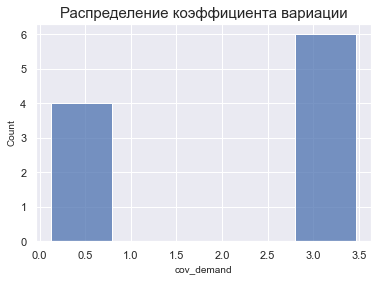

In [28]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.histplot(df_12m_units['cov_demand']).set_title("Распределение коэффициента вариации",fontsize=15)


In [29]:
def xyz_classify_product(cov):
    """Применение XYZ классификации основанной на расчетном коэффициенте вариации количества
    """

    if cov <= 0.2:
        return 'X'
    if cov > 0.2 and cov <= 0.5:
        return 'Y'
    else:
        return 'Z'

df_12m_units['xyz_class'] = df_12m_units['cov_demand'].apply(xyz_classify_product)
df_12m_units.xyz_class.value_counts()


Z    7
Y    2
X    1
Name: xyz_class, dtype: int64

In [30]:
df_monthly = df_12m_units.groupby('xyz_class').agg(
    m1=('m1', 'sum'),
    m2=('m2', 'sum'),
    m3=('m3', 'sum'),
    m4=('m4', 'sum'),
    m5=('m5', 'sum'),
    m6=('m6', 'sum'),
    m7=('m7', 'sum'),
    m8=('m8', 'sum'),
    m9=('m9', 'sum'),
    m10=('m10', 'sum'),
    m11=('m11', 'sum'),
    m12=('m12', 'sum'))
df_monthly

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
xyz_class,,,,,,,,,,,,
X,448.0,433.0,437.0,427.0,523.0,588.0,522.0,470.0,516.0,591.0,456.0,410.0
Y,162.0,145.0,138.0,124.0,164.0,174.0,203.0,237.0,246.0,287.0,225.0,223.0
Z,8.0,17.0,17.0,15.0,9.0,39.0,50.0,30.0,23.0,39.0,129.0,23.0


Преобразуем в таблицу для графиков

In [32]:
df_monthly_unstacked = df_monthly.unstack('xyz_class').to_frame()
df_monthly_unstacked = df_monthly_unstacked.reset_index().rename(columns={'level_0': 'month', 0: 'demand'})
df_monthly_unstacked.head()

,month,xyz_class,demand
0,m1,X,448.0
1,m1,Y,162.0
2,m1,Z,8.0
3,m2,X,433.0
4,m2,Y,145.0


Покажем динамику изменения категорий по месяцам

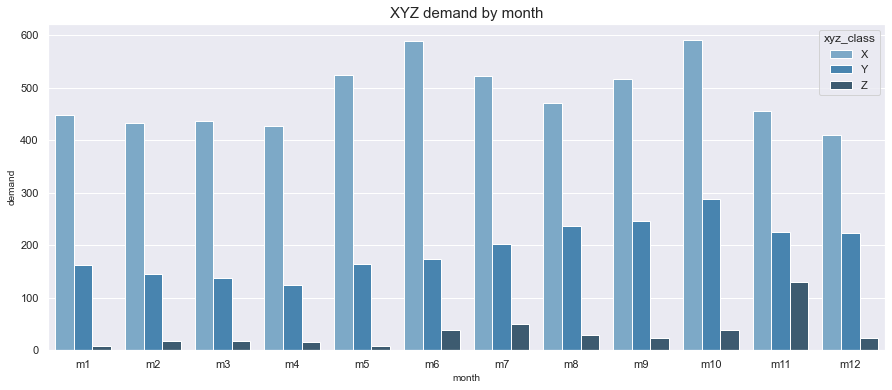

In [33]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="demand", 
                 hue="xyz_class", 
                 data=df_monthly_unstacked,
                 palette="Blues_d")\
                .set_title("XYZ demand by month",fontsize=15)


Спрос на товар Х класса высок и сезонален, спрос на товар Y класса ниже и возрастает только к пиковому месяцу продаж, как и в случае с товаром Z класса

# ABC анализ

In [37]:
df_12m.columns

Index(['КодКонтрагента', 'КодНоменклатуры', 'МесяцПродажи', 'Количество',
       'СтоимостьПродажиБезНДС'],
      dtype='object')

In [41]:
df_skus = df_12m.groupby('КодНоменклатуры').agg(
    unique_purchases=('КодНоменклатуры', 'nunique'),
    total_units=('Количество', 'sum'),
    total_revenue=('СтоимостьПродажиБезНДС', 'sum'),
).sort_values(by='total_revenue', ascending=False).reset_index()

In [44]:
df_skus['revenue_cumsum'] = df_skus['total_revenue'].cumsum()
df_skus['revenue_total'] = df_skus['total_revenue'].sum()
df_skus['revenue_running_percentage'] = (df_skus['revenue_cumsum'] / df_skus['revenue_total']) * 100

df_skus

,КодНоменклатуры,unique_purchases,total_units,total_revenue,revenue_cumsum,revenue_total,revenue_running_percentage
0,1780,1,5821,2890586.15,2890586.15,3768423.03,76.705458
1,4534,1,1505,663951.74,3554537.89,3768423.03,94.324280
2,16069,1,823,79762.02,3634299.91,3768423.03,96.440869
...,...,...,...,...,...,...,...
7,241,1,4,13490.00,3754192.76,3768423.03,99.622381
8,3272,1,20,8676.67,3762869.43,3768423.03,99.852628
9,4449,1,24,5553.60,3768423.03,3768423.03,100.000000


In [48]:
def abc_classify_product(percentage):
    """Применение ABC классификации основанной на расчетном коммулятивном доходе
    по отсортированному коду номенклатуры в порядке убывания общего дохода
    """

    if percentage > 0 and percentage <= 80:
        return 'A'
    if percentage > 80 and percentage <= 95:
        return 'B'
    else:
        return 'C'


In [49]:
df_skus['abc_class'] = df_skus['revenue_running_percentage'].apply(abc_classify_product)
df_skus['abc_rank'] = df_skus['revenue_running_percentage'].rank().astype(int)
df_skus

,КодНоменклатуры,unique_purchases,total_units,total_revenue,revenue_cumsum,revenue_total,revenue_running_percentage,abc_class,abc_rank
0,1780,1,5821,2890586.15,2890586.15,3768423.03,76.705458,A,1
1,4534,1,1505,663951.74,3554537.89,3768423.03,94.324280,B,2
2,16069,1,823,79762.02,3634299.91,3768423.03,96.440869,C,3
...,...,...,...,...,...,...,...,...,...
7,241,1,4,13490.00,3754192.76,3768423.03,99.622381,C,8
8,3272,1,20,8676.67,3762869.43,3768423.03,99.852628,C,9
9,4449,1,24,5553.60,3768423.03,3768423.03,100.000000,C,10


In [51]:
df_abc = df_skus.groupby('abc_class').agg(
    total_skus=('КодНоменклатуры', 'nunique'),
    total_units=('total_units', sum),
    total_revenue=('total_revenue', sum),
).reset_index()

df_abc

,abc_class,total_skus,total_units,total_revenue
0,A,1,5821,2890586.15
1,B,1,1505,663951.74
2,C,8,1222,213885.14


Если мы рассмотрим статистику каждого класса, то увидим, что у нас есть 1 номенклатура класса A, приносящая 80% нашего дохода. В классе B тоже 1 товар, который генерируют следующие 15%, а затем 8 номенклатур класса C, генерирующие оставшиеся 5% продаж.

In [62]:
1505/5821

0.2585466414705377

In [64]:
663951/2890586

0.22969425576682376

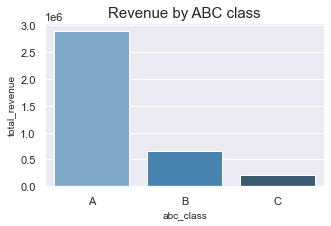

In [56]:
f, ax = plt.subplots(figsize=(5, 3))
ax = sns.barplot(x="abc_class", 
                 y="total_revenue", 
                 data=df_abc,
                 palette="Blues_d")\
                .set_title("Revenue by ABC class",fontsize=15)


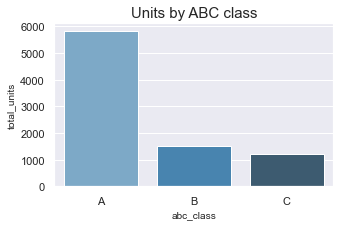

In [60]:
f, ax = plt.subplots(figsize=(5, 3))
ax = sns.barplot(x="abc_class", 
                 y="total_units", 
                 data=df_abc,
                 palette="Blues_d")\
                .set_title("Units by ABC class",fontsize=15)


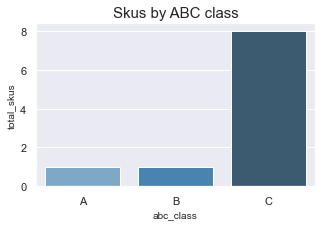

In [61]:
f, ax = plt.subplots(figsize=(5, 3))
ax = sns.barplot(x="abc_class", 
                 y="total_skus", 
                 data=df_abc,
                 palette="Blues_d")\
                .set_title("Skus by ABC class",fontsize=15)

# Анализ запасов ABC-XYZ

Последним шагом является объединение наших данных управления запасами XYZ с нашими данными управления запасами ABC. Выберем ключевые показатели, которые хотим сохранить из нашего анализа ABC, и создадим новый датасет, а затем присоединим его к данным анализа XYZ. 

In [67]:
df_12m_units.columns

Index(['КодНоменклатуры', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'total_demand', 'avg_demand', 'std_demand',
       'cov_demand', 'xyz_class'],
      dtype='object', name='МесяцПродажи')

In [70]:
df_abc = df_skus[['КодНоменклатуры','abc_class','abc_rank','total_revenue']]
df_xyz = df_12m_units.copy()
df_xyz = df_xyz[['КодНоменклатуры', 'total_demand', 'avg_demand', 'std_demand',
       'cov_demand', 'xyz_class']]
df_abc_xyz = df_abc.merge(df_xyz, on='КодНоменклатуры', how='left')
df_abc_xyz.head()

,КодНоменклатуры,abc_class,abc_rank,total_revenue,total_demand,avg_demand,std_demand,cov_demand,xyz_class
0,1780,A,1,2890586.15,5821.0,485.083333,61.828882,0.127460,X
1,4534,B,2,663951.74,1505.0,125.416667,36.686530,0.292517,Y
2,16069,C,3,79762.02,823.0,68.583333,14.939017,0.217823,Y
3,4450,C,4,31159.00,30.0,2.500000,8.660254,3.464102,Z
4,16070,C,5,28998.85,286.0,23.833333,13.099850,0.549644,Z


In [71]:
df_abc_xyz['abc_xyz_class'] = df_abc_xyz['abc_class'].astype(str) + df_abc_xyz['xyz_class'].astype(str)

In [73]:
df_abc_xyz_summary = df_abc_xyz.groupby('abc_xyz_class').agg(
    total_skus=('КодНоменклатуры', 'nunique'),
    total_demand=('total_demand', sum),
    avg_demand=('avg_demand', 'mean'),    
    total_revenue=('total_revenue', sum),    
).reset_index()

df_abc_xyz_summary.sort_values(by='total_revenue', ascending=False)

,abc_xyz_class,total_skus,total_demand,avg_demand,total_revenue
0,AX,1,5821.0,485.083333,2890586.15
1,BY,1,1505.0,125.416667,663951.74
3,CZ,7,399.0,4.750000,134123.12
2,CY,1,823.0,68.583333,79762.02


Построим график

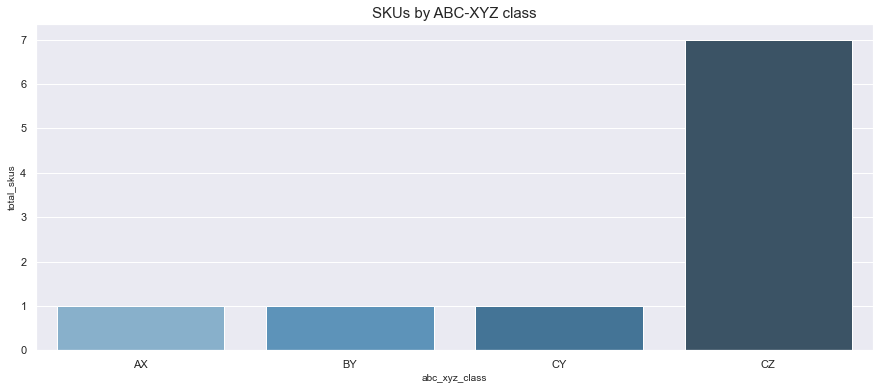

In [74]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_skus", 
                 data=df_abc_xyz_summary,
                 palette="Blues_d")\
                .set_title("SKUs by ABC-XYZ class",fontsize=15)


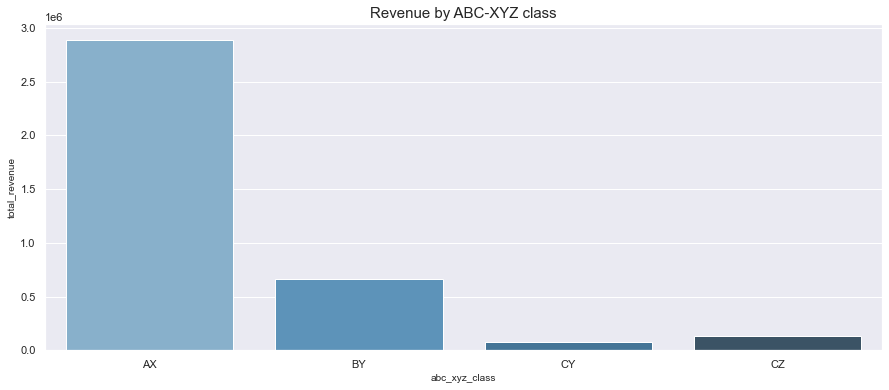

In [75]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_revenue", 
                 data=df_abc_xyz_summary, 
                 palette="Blues_d")\
                .set_title("Revenue by ABC-XYZ class",fontsize=15)


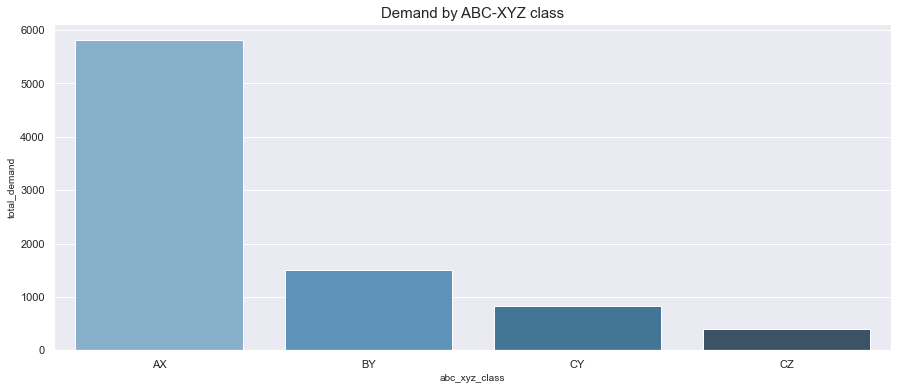

In [76]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_demand", 
                 data=df_abc_xyz_summary, 
                 palette="Blues_d")\
                .set_title("Demand by ABC-XYZ class",fontsize=15)


 Большая часть нашего дохода поступает от продуктов класса AX. Они приносят 80% дохода, но также являются сезонными. Внизу у нас есть небольшая группа SKU класса B, которые вносят небольшой вклад, но, с другой стороны, не очень изменчивы, поэтому их легче предсказать. Возможно, стоит уделить внимание повышению категории В товара в категорию А  акцентируясь на продажах и спросе. Также стоит просегментировать клиентов категории С для расширения ассортимента В категории

### Понимание классов ABC-XYZ

Комбинируя данные ABC и XYZ, мы создаем девять различных классов. Все классы с префиксом A приносят высокий доход, классы B приносят средний доход, а классы C приносят низкий доход.

Точно также классы X имеют устойчивый спрос, их легко прогнозировать и ими легко управлять. Классы Y имеют переменный, но предсказуемый спрос, поэтому ими сложнее управлять, чем классами X.И Z-классы самые жесткие из всех. Они непрогнозиуремы и в разных объемах, поэтому ими сложнее управлять. 